## graph creation function

In [1]:
def dense_graph(n,e):
    '''
    ip:  n: no of nodes
        e: probability of edge between two nodes
    op: list:edges of random dense graph
    '''
    edge=[(0,1)]
    current_node=2
    while(current_node<n):
        f_node=random.choice(range(current_node))
        edge.append([f_node,current_node])
        for i in range(current_node):
            if(i!=f_node):
                add_node=random.choices([0,1],weights=[(1-e)*100,e*100])
                if(add_node==[1]):
                    edge.append((i,current_node))
        current_node=current_node+1
    return edge

## creating graph

In [296]:
import networkx as nx
from collections import OrderedDict
nodes=16
degree=3
graph_spectral={}
for i in range(100):
    g_regular=nx.random_regular_graph(degree,nodes)
    e_val=nx.adjacency_spectrum(g_regular)
    # adj.toarray()
    e_val=np.abs(e_val)
    e_val.sort()
    e_val=e_val[::-1]
    spectral_gap=e_val[0]-e_val[1]
    graph_spectral[spectral_gap]= g_regular
keys=list(graph_spectral.keys())
print(graph_spectral)
graph_spectral = dict(sorted(graph_spectral.items()))
print(graph_spectral)


{0.25700388202505087: <networkx.classes.graph.Graph object at 0x7ff6e85b59d0>, 0.2642914276748969: <networkx.classes.graph.Graph object at 0x7ff6e85b5970>, 0.4083382043024413: <networkx.classes.graph.Graph object at 0x7ff6e85b58b0>, 0.3090615021253309: <networkx.classes.graph.Graph object at 0x7ff6e85bbb80>, 0.27502519510342305: <networkx.classes.graph.Graph object at 0x7ff6e85bbaf0>, 0.21406023857834677: <networkx.classes.graph.Graph object at 0x7ff6e85bbf70>, 0.4783893132608106: <networkx.classes.graph.Graph object at 0x7ff6e85bba90>, 0.3025714057396205: <networkx.classes.graph.Graph object at 0x7ff6e85b5a90>, 0.18442663292411066: <networkx.classes.graph.Graph object at 0x7ff6e85b5b80>, 0.2546112471648323: <networkx.classes.graph.Graph object at 0x7ff6e85b5940>, 0.2913369189375188: <networkx.classes.graph.Graph object at 0x7ff6e85b5910>, 0.16692097589253896: <networkx.classes.graph.Graph object at 0x7ff6e85b58e0>, 0.3887523784547189: <networkx.classes.graph.Graph object at 0x7ff6e85b

In [311]:
pool=10
selected_graph=[]
keys=list(graph_spectral.keys())
keys=keys[::-1]
for i in range(pool):
    selected_graph.append(graph_spectral[keys[i]])
pos=nx.circular_layout(selected_graph[0])
print(keys)




[0.6155465835680194, 0.5790533576593018, 0.557137093167682, 0.5495395533375071, 0.5188056959079979, 0.5117698074141339, 0.5087212349832382, 0.50234678186178, 0.4863845570508567, 0.4783893132608106, 0.4722410686742977, 0.46084599377503643, 0.4592351354513431, 0.45594115506871535, 0.45354062868917655, 0.4384471871911728, 0.4384471871911684, 0.43816496033671637, 0.43551199428335874, 0.4343598012510963, 0.4304828543116752, 0.4296396855994211, 0.42315153766226965, 0.41401807420811343, 0.4086971922399272, 0.4083382043024413, 0.4017891852376807, 0.39806386089836776, 0.39768658902690524, 0.39718047165616843, 0.3946489194274161, 0.39045597382571806, 0.3887523784547189, 0.3880798852073526, 0.38798706460615096, 0.3840011354267485, 0.38241604282640385, 0.37626304658460485, 0.372660423638016, 0.3660909663151508, 0.3647831318398782, 0.3640014695761189, 0.36232829796118393, 0.36111029407917705, 0.3517943430836077, 0.33988162243382813, 0.3380382750278632, 0.3356947017412444, 0.3324148387712369, 0.3303

### save selected graph

In [312]:
counter=0
for i in selected_graph:
    nx.write_adjlist(i,'data/8_nodes/graph_'+str(counter)+'.adjlist')
    counter+=1

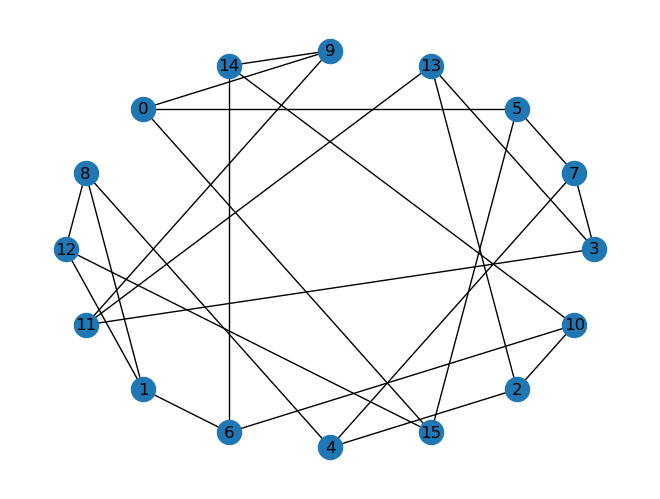

In [316]:
counter=0
g=nx.read_adjlist('data/8_nodes/graph_'+str(counter)+'.adjlist',nodetype=int)
nx.draw(g,with_labels=True,pos=pos)

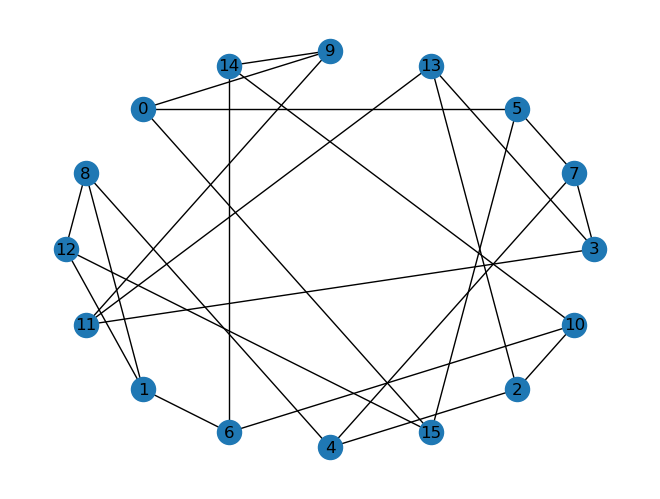

In [317]:
nx.draw(selected_graph[counter],with_labels=True,pos=pos)


10
